<a href="https://colab.research.google.com/github/abdulrahimq/audio-to-stress/blob/main/wav_to_vec_experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source: https://github.com/openai/whisper/blob/main/whisper/audio.py

In [36]:
!pip install -U openai-whisper
from whisper import audio
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv("Arabic_Stress _Training_Data _Sheet1.csv")

In [38]:
df.info()
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   soundVec    0 non-null      float64
 1   ipa         99 non-null     object 
 2   syllables   0 non-null      float64
 3   stress      0 non-null      float64
 4   audio_urls  89 non-null     object 
dtypes: float64(3), object(2)
memory usage: 4.0+ KB


(99, 5)

In [39]:
df.head(10)

,soundVec,ipa,syllables,stress,audio_urls
0,NaN,ʔāḵir<p:ʔæː.xɪr><p:ʔaː.xɪr>,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
1,NaN,ʔāḵre<p:ˈʔæːx.re> ʔāḵra<p:ˈʔæːx.ra>,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
2,NaN,ʔāḏār<p:ʔaˈðˤɑːrˤ><p:ʔaˈzˤɑːrˤ>,NaN,NaN,NaN
3,NaN,ʔāsef<p:ˈʔæː.sɪf>,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
4,NaN,ʔāsya<p:ˈʔæːs.ja>,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
5,NaN,ʔālāf<p:ʔaˈlæːf>,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
6,NaN,ʔāle<p:ˈʔæː.le> ʔāla<p:ˈʔæː.la>,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
7,NaN,ʔāman<p:ˈʔæː.man>,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
8,NaN,ʔānas<p:ˈʔæː.nas>,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
9,NaN,ʔā<p:ʔɑː>,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...


In [40]:
df['ipa']

,ipa
0,ʔāḵir<p:ʔæː.xɪr><p:ʔaː.xɪr>
1,ʔāḵre<p:ˈʔæːx.re> ʔāḵra<p:ˈʔæːx.ra>
2,ʔāḏār<p:ʔaˈðˤɑːrˤ><p:ʔaˈzˤɑːrˤ>
3,ʔāsef<p:ˈʔæː.sɪf>
4,ʔāsya<p:ˈʔæːs.ja>
...,...
94,ʔaṣarr<p:ʔɑˈsˤɑr>
95,ʔaṣfar<p:ˈʔɑsˤ.fɑrˤ>
96,ʔaṣlaḥ<p:ˈʔɑsˤ.lˤɑħ>
97,ʔaṣanṣēr<p:ʔɑ.sˤɑnˈsˤeːr>


In [41]:
def clean_transcription(dataframe):
  """
  A function that takes the dataframe and cleans the ipa column.
  first holds all the strings between '<' and '>', deletes everything else, then
  removes every occurence of 'p',':', and '<'/'>' from the result, returning a list of
  raw ipa transcriptions separated by ','
  """
  for i in range(len(dataframe['ipa'])):
    r = re.findall("<.*?>", dataframe.loc[i, 'ipa'])
    for k in range(len(r)):
      r[k] = re.sub("[p:><]", "", r[k])
    dataframe.loc[i, 'ipa'] = ", ".join(r)

In [42]:
clean_transcription(df)
df.head(10)


,soundVec,ipa,syllables,stress,audio_urls
0,NaN,"ʔæː.xɪr, ʔaː.xɪr",NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
1,NaN,"ˈʔæːx.re, ˈʔæːx.ra",NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
2,NaN,"ʔaˈðˤɑːrˤ, ʔaˈzˤɑːrˤ",NaN,NaN,NaN
3,NaN,ˈʔæː.sɪf,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
4,NaN,ˈʔæːs.ja,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
5,NaN,ʔaˈlæːf,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
6,NaN,"ˈʔæː.le, ˈʔæː.la",NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
7,NaN,ˈʔæː.man,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
8,NaN,ˈʔæː.nas,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...
9,NaN,ʔɑː,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...


In [43]:
def populate(row, column, value, dataframe):
  """
  it simply rewrites this location in the dataframe with the value.
  """
  dataframe.loc[row, column] = value

In [44]:
def count_syllables(dataframe):
  """
  a function which takes the dataframe and for each transcription,
  counts the syllables indicated in the ipa. for the transcription,
  it counts each occurence of '.' and any occurence of 'ˈ' (note that this is NOT an apostrophe?) that
  is preceded by a word character. when there is more than one transcription, we use
  the first one by default.
  """
  for i in range(len(dataframe['ipa'])):
    s = dataframe.loc[i, 'ipa']
    if len(re.findall(",", s)) > 0:
      s = re.split(", ", s)[0]
    syllables =len(re.findall(r"\wˈ", s)) + len(re.findall(r"\.", s)) + 1
    populate(i, 'syllables', syllables, dataframe)


In [45]:
count_syllables(df)
df.head(10)

,soundVec,ipa,syllables,stress,audio_urls
0,NaN,"ʔæː.xɪr, ʔaː.xɪr",2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
1,NaN,"ˈʔæːx.re, ˈʔæːx.ra",2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
2,NaN,"ʔaˈðˤɑːrˤ, ʔaˈzˤɑːrˤ",2.0,NaN,NaN
3,NaN,ˈʔæː.sɪf,2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
4,NaN,ˈʔæːs.ja,2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
5,NaN,ʔaˈlæːf,2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
6,NaN,"ˈʔæː.le, ˈʔæː.la",2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
7,NaN,ˈʔæː.man,2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
8,NaN,ˈʔæː.nas,2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
9,NaN,ʔɑː,1.0,NaN,https://upload.wikimedia.org/wikipedia/commons...


In [46]:

def find_stress_location(dataframe):
  """
  takes each transcription in the dataframe and identifies where the stress is marked.
  for each transcription, we check first if there is stress (the presence of 'ˈ' indicates stress),
  if so, the function counts the number of occurences of '.' before the first appearance of 'ˈ' to
  make the determination of on which syllable the stress is located. If there is more than one transcription
  fot the word, the first one is used by default. We assume there is at most one stress possible in a word.
  """
  stress = 0
  for i in range(len(dataframe['ipa'])):
    s = dataframe.loc[i,'ipa']
    if len(re.findall(",", s)) > 0:
      s = re.split(", ", s)[0]
    if len(re.findall("ˈ", s)) == 0:
      continue
    if len(re.findall(r"\wˈ", s)) == 1:
      r = re.findall(r"\..*ˈ", s)
      if len(r) == 0:
        stress = 2
      else:
        stress = len(re.findall(r"\.",r[0])) + 2
    else:
      stress = 1
    populate(i, 'stress', stress, dataframe)

In [47]:
find_stress_location(df)
df.head(20)





,soundVec,ipa,syllables,stress,audio_urls
0,NaN,"ʔæː.xɪr, ʔaː.xɪr",2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
1,NaN,"ˈʔæːx.re, ˈʔæːx.ra",2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
2,NaN,"ʔaˈðˤɑːrˤ, ʔaˈzˤɑːrˤ",2.0,2.0,NaN
3,NaN,ˈʔæː.sɪf,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
4,NaN,ˈʔæːs.ja,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
5,NaN,ʔaˈlæːf,2.0,2.0,https://upload.wikimedia.org/wikipedia/commons...
6,NaN,"ˈʔæː.le, ˈʔæː.la",2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
7,NaN,ˈʔæː.man,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
8,NaN,ˈʔæː.nas,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
9,NaN,ʔɑː,1.0,NaN,https://upload.wikimedia.org/wikipedia/commons...


In [48]:
def mark_mono_syllables(dataframe):

  """
  as per a linguistic observation, this function marks every monosyllabic Arabic word in the list with a stress.
  the stress is assumed to be on the first (and only) syllable.
  """
  for i in range (len(dataframe['syllables'])):
    if dataframe.loc[i, 'syllables'] == 1:
      populate(i, 'stress', 1, dataframe)


In [49]:
mark_mono_syllables(df)
df.head(20)

,soundVec,ipa,syllables,stress,audio_urls
0,NaN,"ʔæː.xɪr, ʔaː.xɪr",2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
1,NaN,"ˈʔæːx.re, ˈʔæːx.ra",2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
2,NaN,"ʔaˈðˤɑːrˤ, ʔaˈzˤɑːrˤ",2.0,2.0,NaN
3,NaN,ˈʔæː.sɪf,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
4,NaN,ˈʔæːs.ja,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
5,NaN,ʔaˈlæːf,2.0,2.0,https://upload.wikimedia.org/wikipedia/commons...
6,NaN,"ˈʔæː.le, ˈʔæː.la",2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
7,NaN,ˈʔæː.man,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
8,NaN,ˈʔæː.nas,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
9,NaN,ʔɑː,1.0,1.0,https://upload.wikimedia.org/wikipedia/commons...


In [50]:
def generate_sound_vec(dataframe):
  """
  takes the dataframe and generates the numerical representation of
  the sound for each word. the audio package from the whisper model is used to generate the vector, the
  vectors are padded to be of the same dimension.
  """
  v = 0
  for i in range(len(dataframe['audio_urls'])):
    s = dataframe.loc[i, 'audio_urls']
    if type(s) == float:
      continue
    try:
      v = audio.load_audio(s)
    except Exception:
      continue
    populate(i, 'soundVec', len(v), dataframe)


In [51]:
generate_sound_vec(df)
df.head(20)

,soundVec,ipa,syllables,stress,audio_urls
0,NaN,"ʔæː.xɪr, ʔaː.xɪr",2.0,NaN,https://upload.wikimedia.org/wikipedia/commons...
1,19547.0,"ˈʔæːx.re, ˈʔæːx.ra",2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
2,NaN,"ʔaˈðˤɑːrˤ, ʔaˈzˤɑːrˤ",2.0,2.0,NaN
3,15089.0,ˈʔæː.sɪf,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
4,18061.0,ˈʔæːs.ja,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
5,NaN,ʔaˈlæːf,2.0,2.0,https://upload.wikimedia.org/wikipedia/commons...
6,18219.0,"ˈʔæː.le, ˈʔæː.la",2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
7,20949.0,ˈʔæː.man,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
8,18219.0,ˈʔæː.nas,2.0,1.0,https://upload.wikimedia.org/wikipedia/commons...
9,15488.0,ʔɑː,1.0,1.0,https://upload.wikimedia.org/wikipedia/commons...


In [83]:
def compute_vec_stats(vector):
  """
  computes and prints a few basic statistics on the distribution in
  the numerical vector provided. also displays a plot of the values.
  """
  print("Shape: ", vector.shape)
  mean_vector_length = np.nanmean(vector)
  print("mean vector length: ", mean_vector_length)
  median_vector_length = np.nanmedian(vector)
  print("median vector length: ", median_vector_length)
  maximum_vector = np.nanpercentile(vector, 100)
  minimum_vector = np.nanpercentile(vector, 0)
  print("maximum vector: ", maximum_vector)
  print("minimum vector: ", minimum_vector)
  fig, axes = plt.subplots()
  axes.plot(vector, 'ko')


Shape:  (99,)
mean vector length:  19068.817073170732
median vector length:  18219.0
maximum vector:  56448.0
minimum vector:  14123.0


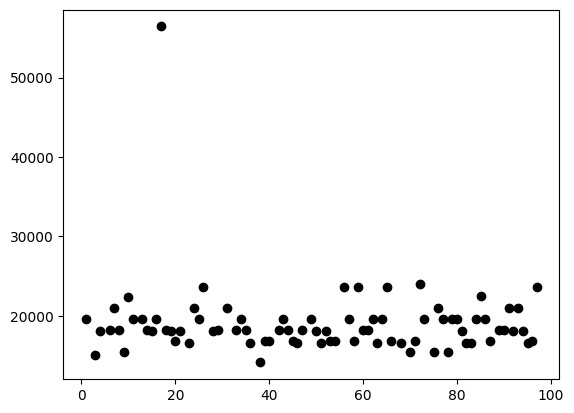

In [84]:
soundVecLength = np.asarray(df['soundVec'])
compute_vec_stats(soundVecLength)

Shape:  (99,)
mean vector length:  18607.345679012345
median vector length:  18219.0
maximum vector:  24005.0
minimum vector:  14123.0


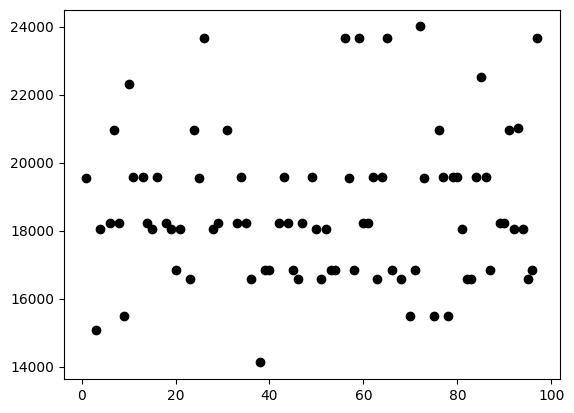

In [86]:
soundVecLength[17] = np.nan
compute_vec_stats(soundVecLength)


In [94]:
def generate_padded_audio_vectors(dataframe, size):
  """
  takes in the data frame and returns an array representing the audio vectors,
  each of the size specified. The audio package from whisper is used to generate, and pad or trim
  the vectors.
  """
  vectors = np.ndarray((len(dataframe['soundVec']), size))
  for i in range(len(vectors)):
    url_string = dataframe.loc[i, 'audio_urls']
    if type(url_string) == float:
      continue
    try:
      vectors[i,:] = audio.pad_or_trim(audio.load_audio(url_string), size)
    except Exception:
      continue
  return vectors


In [95]:
soundVecs = generate_padded_audio_vectors(df, 18607)
soundVecs

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.88281250e-04, -5.18798828e-04, -5.79833984e-04, ...,
        -3.66210938e-04, -2.74658203e-04, -1.52587891e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.05175781e-05, -6.10351562e-05, -6.10351562e-05, ...,
         1.52587891e-02,  1.45568848e-02,  1.30310059e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [129]:
def visualize(vector):
  """
  takes the vector, which by assumption is of an audio representation,
  then displays its wave information, along with its spectrogram.
  """
  fig, axes1 = plt.subplots()
  fig, axes2 = plt.subplots()
  axes1.plot(vector, '-')
  axes2.specgram(vector)

[-0.00015259 -0.00024414 -0.00024414 ...  0.          0.
  0.        ]
(18607,)


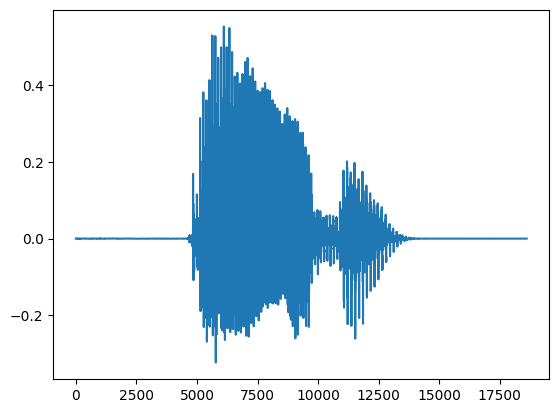

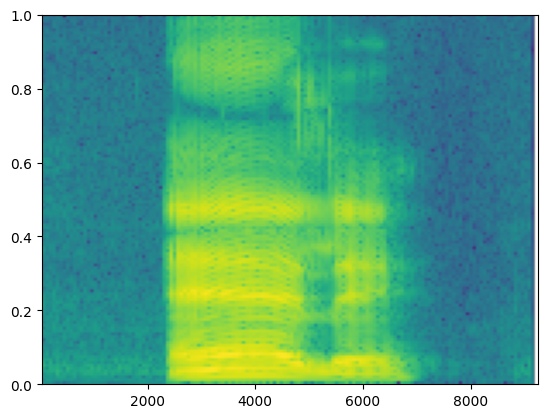

In [135]:
i = 6
print(soundVecs[i])
print(soundVecs[i].shape)
visualize(soundVecs[i])